Stationarity of time series
Stationary - mean and variance (volatility / std^2) are constant over time
- need two moments of charecterization
- cleaned and made galcian
ex. pct change of a stock
Non Stationary - mean and vairance are non-constant over time
- need many more moments of expectation
- non-galcian
ex. stock price

White noise / Broworian Motion / Random Walk - random process
- t0 is not coorlated to t1 or any other day

How To Tell...
1. Visually
2. Agumented Dickey-Fuller 
- augmented df p-value <= .05 stationary
- augmented df p-value > .05 non-stationary

Auto-coorelation - how to predict behaviour based on historical data


Auto Regressive Moving Averages (ARMA) Models - how we can use values from the past to predict the future
- Yt - what is the value "Y" at of a time series at time t
- Yt-k - time k units ago

These units varry!

Auto Corelation
- used to determine if autoregrssive model is appropreitte

Partial Auto Correlation
- use it to chose the the terms of the model

Order Number - how many lags are significant

AR Model (1st order - one lag)
Yt = M (mean of time series) + coef of one Yt-1 + E(error)t

AR Model (2nd order)
Yt = M + Coef Yt-2 + Coef Yt-2 + Et

Model = ARMA(returns, order = (1,1))


AIC / BIC - the lower the better
- penalizes order when it gets too high

Grid Search
- Do tests to find lowest AIC and BIC

In [1]:
# imports
import numpy as np
import pandas as pd
import random

In [2]:
# Data Generation
# Warning! Boilerplate code
n = 100
x = np.arange(n)
y_stationary = np.random.normal(0, 1, n)

y_nonstationary = [random.random() + (x * .01) for x in range(100)]

df = pd.DataFrame({
    "Stationary": y_stationary,
    "Nonstationary": y_nonstationary
})

In [3]:
df.head()

,Stationary,Nonstationary
0,-1.332654,0.291370
1,1.355580,0.653169
2,1.396763,0.930404
3,-0.659511,0.691914
4,1.607579,0.716213


<AxesSubplot:>

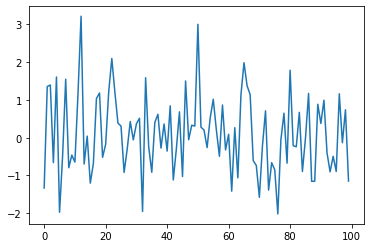

In [4]:
df['Stationary'].plot()

<AxesSubplot:>

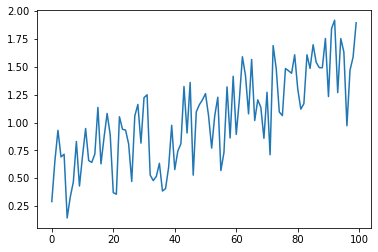

In [5]:
df['Nonstationary'].plot()

In [6]:
from statsmodels.tsa.stattools import adfuller # augmented dicky-fuller

def is_stationary(series_x): 
    """
    Input expected: Pandas series
    """
    series_x.plot(title=series_x.name)
    
    result = adfuller(series_x)
    # Access the contents of the results:
    print('ADF Statistic: %f' % result[0])
    print('p-value:        %f ' % result[1])
    print('Lags used:      %d' % result[2])
    print('Critical Values:')
    for key, value in result[4].items():
        print((key, value))
    

    p_value = result[1]
    if p_value <= 0.05: 
        return True 
    elif p_value > 0.05: 
        return False

In [7]:
adfuller(df.Stationary)

(-10.133087471100945,
 8.812528157676014e-18,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 242.71217410186486)

ADF Statistic: -10.133087
p-value:        0.000000 
Lags used:      0
Critical Values:
('1%', -3.498198082189098)
('5%', -2.891208211860468)
('10%', -2.5825959973472097)


True

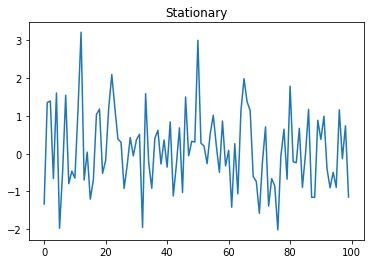

In [9]:
# testing for stationarity
is_stationary(df.Stationary)

ADF Statistic: -1.505136
p-value:        0.530969 
Lags used:      3
Critical Values:
('1%', -3.5003788874873405)
('5%', -2.8921519665075235)
('10%', -2.5830997960069446)


False

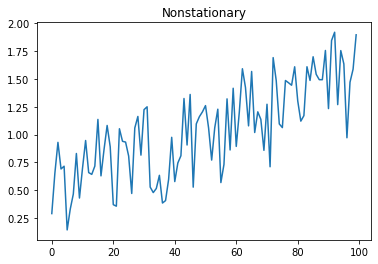

In [12]:
# testing for stationarity
is_stationary(df.Nonstationary)

In [18]:
df['pct_change'] = df.Nonstationary.pct_change()
df.dropna(inplace=True)
df.head()

,Stationary,Nonstationary,pct_change
1,1.355580,0.653169,1.241720
2,1.396763,0.930404,0.424445
3,-0.659511,0.691914,-0.256329
4,1.607579,0.716213,0.035119
5,-1.977460,0.144787,-0.797843


ADF Statistic: -8.566456
p-value:        0.000000 
Lags used:      2
Critical Values:
('1%', -3.5003788874873405)
('5%', -2.8921519665075235)
('10%', -2.5830997960069446)


True

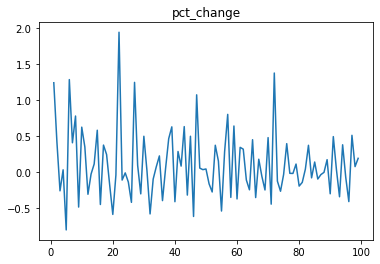

In [19]:
is_stationary(df['pct_change'])

In [23]:
df['diff'] = df['Nonstationary'].diff()
df.dropna(inplace=True)
df.head()

,Stationary,Nonstationary,pct_change,diff
3,-0.659511,0.691914,-0.256329,-0.238490
4,1.607579,0.716213,0.035119,0.024299
5,-1.977460,0.144787,-0.797843,-0.571426
6,-0.476432,0.330907,1.285470,0.186120
7,1.549218,0.466470,0.409672,0.135563


ADF Statistic: -6.862269
p-value:        0.000000 
Lags used:      4
Critical Values:
('1%', -3.503514579651927)
('5%', -2.893507960466837)
('10%', -2.583823615311909)


True

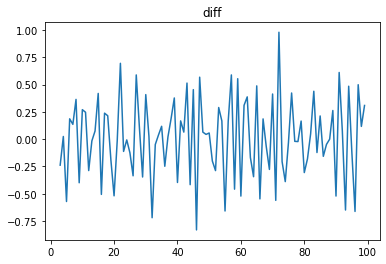

In [24]:
is_stationary(df['diff'])

In [28]:
df['log_diff'] = np.log(df['diff'])
df.dropna(inplace=True)
df.head()

/opt/anaconda3/envs/masterenv/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Stationary,Nonstationary,pct_change,diff,log_diff
4,1.607579,0.716213,0.035119,0.024299,-3.717316
6,-0.476432,0.330907,1.285470,0.186120,-1.681365
7,1.549218,0.466470,0.409672,0.135563,-1.998318
8,-0.795340,0.830520,0.780436,0.364050,-1.010464
10,-0.646922,0.700742,0.626298,0.269860,-1.309850


ADF Statistic: -6.094748
p-value:        0.000000 
Lags used:      0
Critical Values:
('1%', -3.568485864)
('5%', -2.92135992)
('10%', -2.5986616)


True

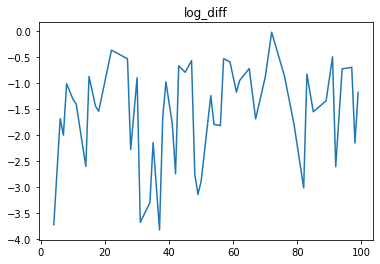

In [29]:
is_stationary(df['log_diff'])